# Tyee data visualizations

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import altair as alt
sns.set()
sns.set_context('talk')
palette = itertools.cycle(sns.color_palette('Set2'))
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8.0, 6.0]

In [3]:
file = '~/sfuvault/Discourse-Lab/Data/The_Tyee_data/the_tyee_posts_preprocessed.csv'
comments = pd.read_csv(file, parse_dates=['created'], infer_datetime_format=True, low_memory=False)

In [4]:
comments['epoch'] = (comments['created'] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')
comments['length'] = comments['message_preprocessed'].str.split().dropna().apply(len)
# comments['length'] = comments['message_preprocessed'].str.len()

In [5]:
comments = comments[comments['created'].dt.year > 1970]
commentsafter2003 = comments[comments['created'].dt.year > 2003]
commentsbefore2018 = commentsafter2003[commentsafter2003['created'].dt.year < 2018]

In [6]:
groupbydate = comments.groupby(comments['created'].dt.date)

commentsbydate = groupbydate.count()['created'].rename('count').reset_index()
commentsbydate['created'] = pd.to_datetime(commentsbydate['created'])
commentsbydate['epoch'] = (commentsbydate['created'] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')

lengthbydate = groupbydate.mean()['length'].reset_index()
lengthbydate['created'] = pd.to_datetime(lengthbydate['created'])
lengthbydate['epoch'] = (lengthbydate['created'] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')

In [7]:
groupbyyear = commentsbefore2018.groupby(commentsbefore2018['created'].dt.year)

lengthbyyear = groupbyyear.mean()['length'].reset_index()
#lengthbyyear['created'] = pd.to_datetime({'year': lengthbyyear['created'], 'month': 1, 'day': 1})
#lengthbyyear['epoch'] = (lengthbyyear['created'] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')

commentsbyyear = groupbyyear.count()['created'].rename('count').reset_index()

In [8]:
groupbymonth = comments.groupby([comments['created'].dt.month, comments['created'].dt.year])

lengthbymonth = groupbymonth.mean()['length'].rename_axis(['month', 'year'], axis=0).reset_index()
lengthbymonth['created'] = pd.to_datetime({'year': lengthbymonth['year'], 'month': lengthbymonth['month'], 'day': 1})
lengthbymonth['epoch'] = (lengthbymonth['created'] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')

commentsbymonth = groupbymonth.count()['created'].rename('count').rename_axis(['month', 'year'], axis=0).reset_index()
commentsbymonth['created'] = pd.to_datetime({'year': commentsbymonth['year'], 'month': commentsbymonth['month'], 'day': 1})
commentsbymonth['epoch'] = (commentsbymonth['created'] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')

## By month and year
Seems to be the sweet spot for visualization.
Dramatically clear how length decreases but number of comments increases.

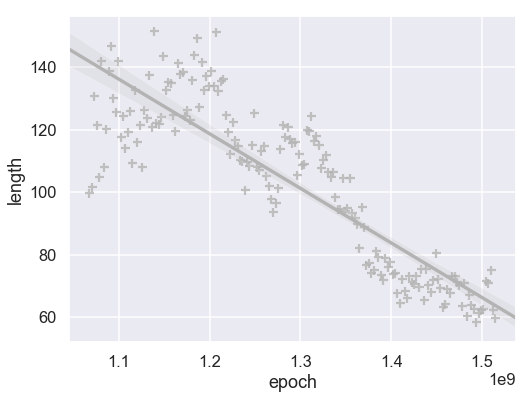

In [121]:
sns.regplot(y='length', x='epoch', data=lengthbymonth, marker='+', ci=95, color=next(palette))

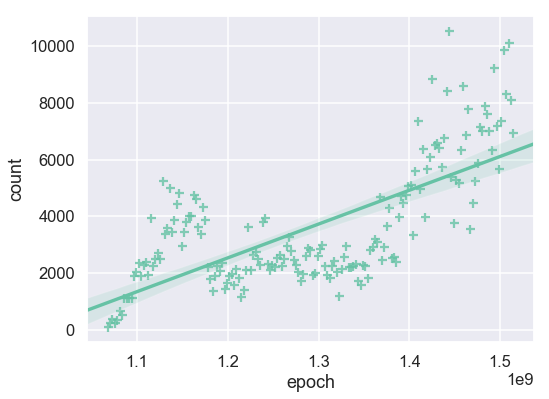

In [122]:
sns.regplot(y='count', x='epoch', data=commentsbymonth, marker='+', ci=95, color=next(palette))

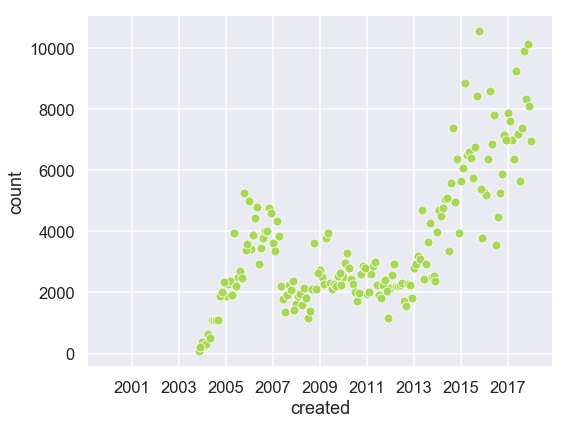

In [206]:
sns.scatterplot(y='count', x='created', data=commentsbymonth, color=next(palette))
plt.tight_layout()

## By date
Might be too granular

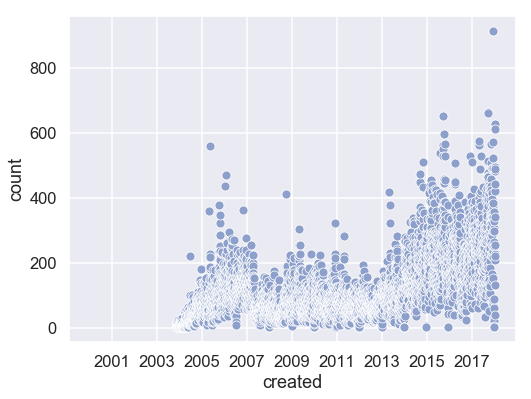

In [124]:
sns.scatterplot(y='count', x='created', data=commentsbydate, color=next(palette))

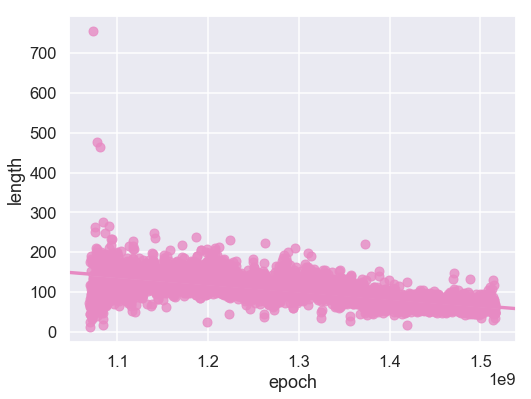

In [125]:
sns.regplot(y='length', x='epoch', data=lengthbydate, robust=True, color=next(palette))

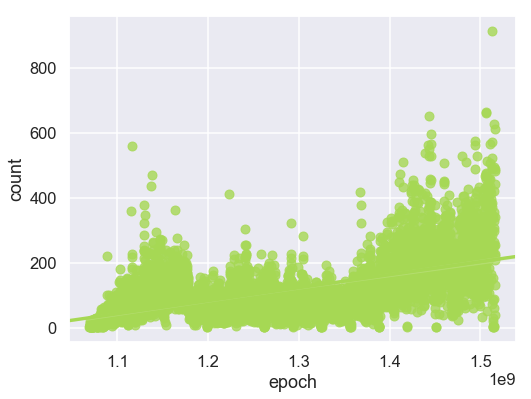

In [126]:
sns.regplot(y='count', x='epoch', data=commentsbydate, color=next(palette))

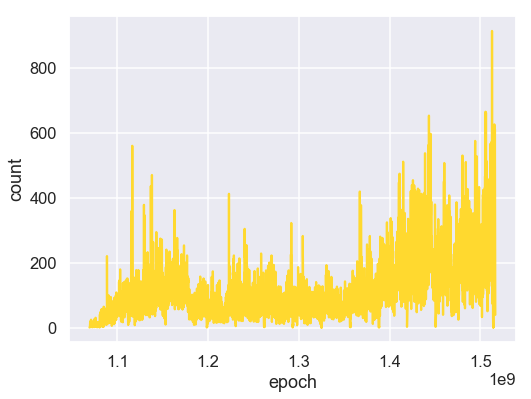

In [127]:
sns.lineplot(commentsbydate['epoch'], commentsbydate['count'], color=next(palette))

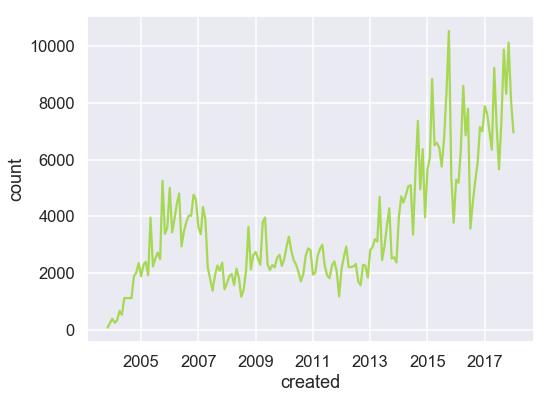

In [116]:
sns.lineplot(commentsbymonth['created'], commentsbymonth['count'], color=next(palette))

## By year
Too few bins, doesn't show the trends as clearly - histogram is best of the lot

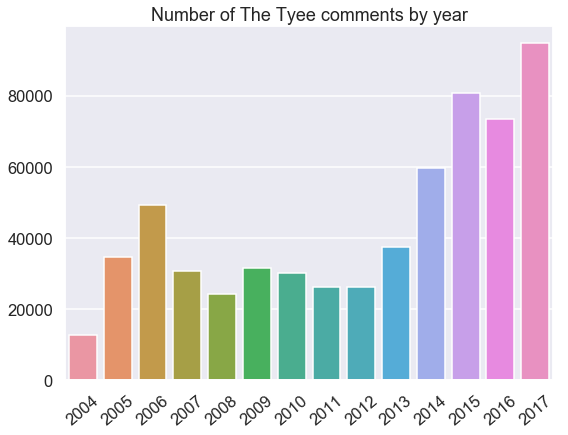

In [109]:
sns.barplot(y='count', x='created', data=commentsbyyear)
plt.xticks(rotation=40)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.title('Number of The Tyee comments by year')

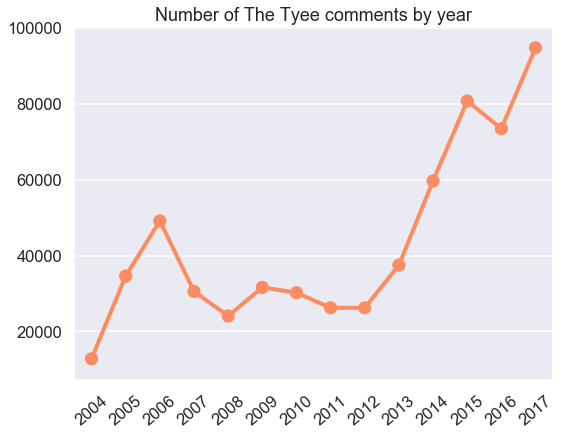

In [110]:
sns.pointplot(y='count', x='created', data=commentsbyyear, color=next(palette))
plt.xticks(rotation=40)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.title('Number of The Tyee comments by year')

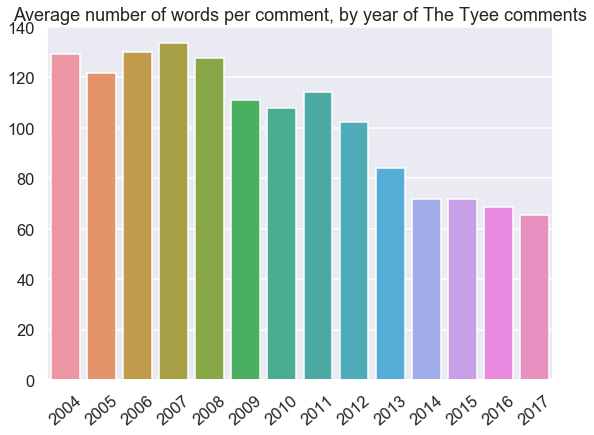

In [120]:
sns.barplot(y='length', x='created', data=lengthbyyear)
plt.xticks(rotation=40)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.title('Average number of words per comment, by year of The Tyee comments')

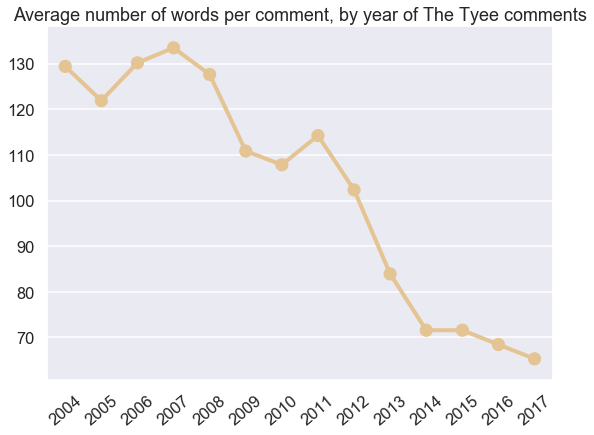

In [118]:
sns.pointplot(y='length', x='created', data=lengthbyyear, color=next(palette))
plt.xticks(rotation=40)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.title('Average number of words per comment, by year of The Tyee comments')

In [12]:
from scipy import stats

In [13]:
fit = stats.linregress(commentsbymonth['epoch'], commentsbymonth['count'])
fit

LinregressResult(slope=1.1926014204544673e-05, intercept=-11780.540948222915, rvalue=0.70643003748969446, pvalue=3.7057862798922524e-27, stderr=9.1914253648431041e-07)

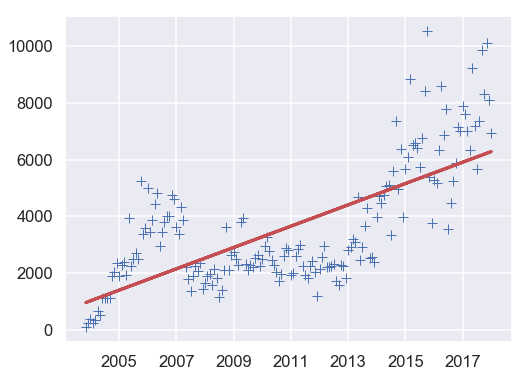

In [35]:
plt.plot(commentsbymonth['created'], commentsbymonth['count'], 'b+', markersize=10, label='')
plt.plot(commentsbymonth['created'], commentsbymonth['epoch']*fit.slope+fit.intercept, 'r-', linewidth=3, label='Best-fit line')

In [196]:
commentsbymonth[commentsbymonth['created'].dt.year < 2003]

,month,year,count,created,epoch


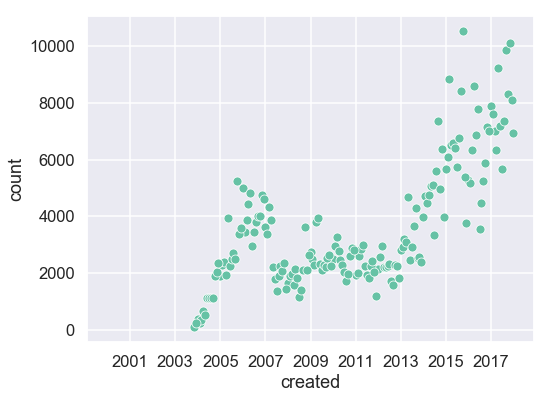

In [202]:
sns.scatterplot(y='count', x='created', data=commentsbymonth, color=next(palette))

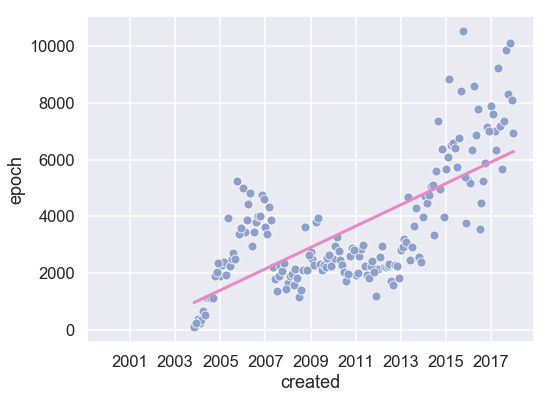

In [14]:
sns.scatterplot(y='count', x='created', data=commentsbymonth, color=next(palette))
sns.lineplot(commentsbymonth['created'], commentsbymonth['epoch']*fit.slope+fit.intercept, linewidth=3, color=next(palette))

In [149]:
# sns.scatterplot(y='count', x='created', data=commentsbymonth, color=next(palette))
# sns.lineplot(commentsbymonth['created'], commentsbymonth['epoch']*fit.slope+fit.intercept, linewidth=3, color=next(palette))

def plotRegression(data, timestamp_col, y_col):
    
    x = [d.to_pydatetime() for d in data[timestamp_col]]
    epoch = (data[timestamp_col] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')
    y = [c for c in data[y_col]]

    rp = sns.regression._RegressionPlotter(epoch, y, ci=95)
    min_x = epoch.min()
    max_x = epoch.max()
    grid, yhat, err_bands = rp.fit_regression(x_range=(min_x,max_x))
    grid = grid.astype('datetime64[s]')
    
    sns.scatterplot(x=x, y=y)
    sns.lineplot(grid,yhat)
    plt.fill_between(grid,err_bands[0,:],err_bands[1,:],alpha=.5)
    
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(data[timestamp_col].min()-pd.Timedelta('432000 m'), data[timestamp_col].max()+pd.Timedelta('432000 m'))

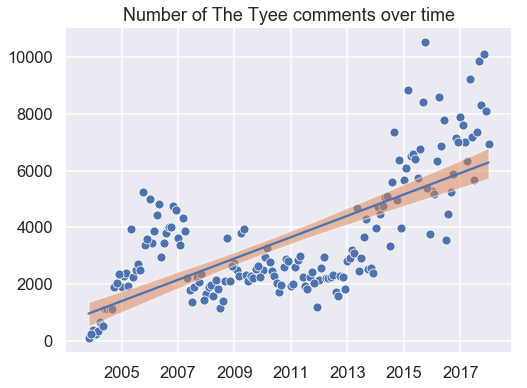

In [152]:
plotRegression(commentsbymonth, 'created', 'count')
plt.title('Number of The Tyee comments over time')
plt.savefig('regression.png')